In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('cardekho_data.csv')
columns = ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
df = df[columns]
df = df.drop(['Car_Name','Seller_Type','Owner'], axis = 1)
encode = ['Fuel_Type', 'Transmission']
label_encoder = LabelEncoder()
for col in encode:
    df[col] = label_encoder.fit_transform(df[col])
df = df.dropna()
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission
0,2014,3.35,5.59,27000,2,1
1,2013,4.75,9.54,43000,1,1
2,2017,7.25,9.85,6900,2,1
3,2011,2.85,4.15,5200,2,1
4,2014,4.60,6.87,42450,1,1
...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,1
297,2015,4.00,5.90,60000,2,1
298,2009,3.35,11.00,87934,2,1
299,2017,11.50,12.50,9000,1,1


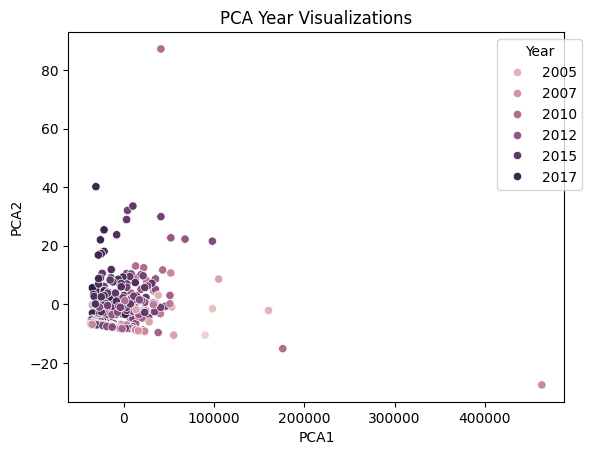

In [3]:
X = df.drop('Year', axis=1)
y = df['Year']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA 1', 'PCA 2'])
pca_df['Year'] = y.reset_index(drop = True)

sns.scatterplot(x='PCA 1', y='PCA 2', hue="Year", data=pca_df)
plt.title("PCA Year Visualizations")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1))
plt.show()

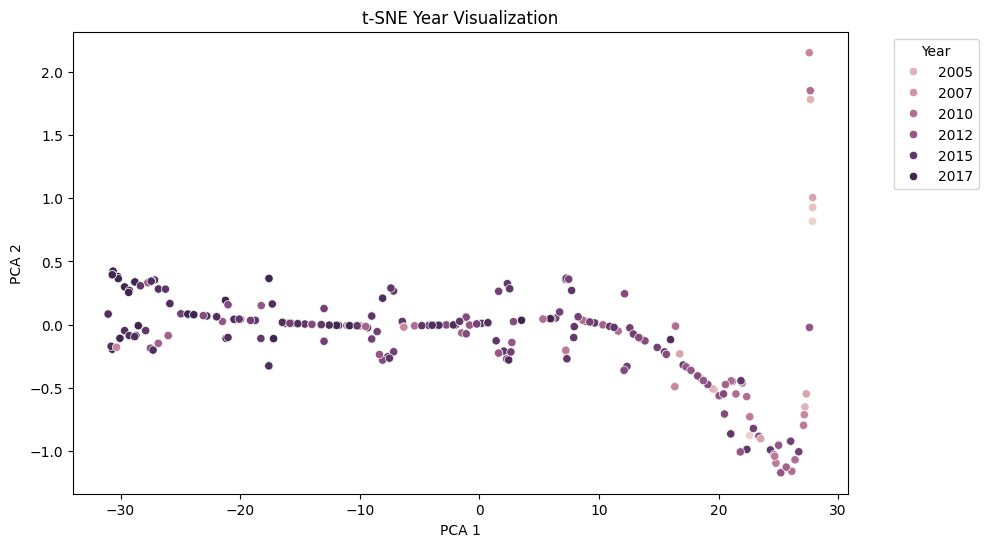

In [4]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

tsne_df = pd.DataFrame(data=X_tsne, columns=['PCA 1', 'PCA 2'])
tsne_df["Year"] = y.reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA 1', y='PCA 2', hue="Year", data=tsne_df)
plt.title("t-SNE Year Visualization")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title="Year", bbox_to_anchor=(1.05, 1))
plt.show()

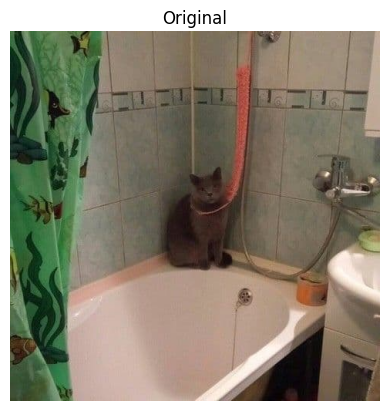

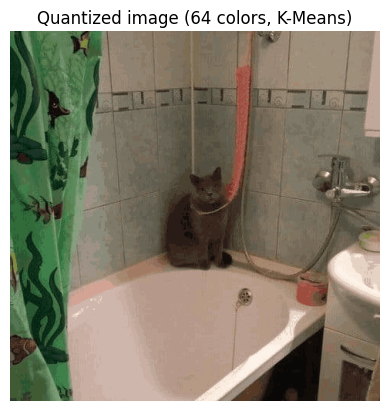

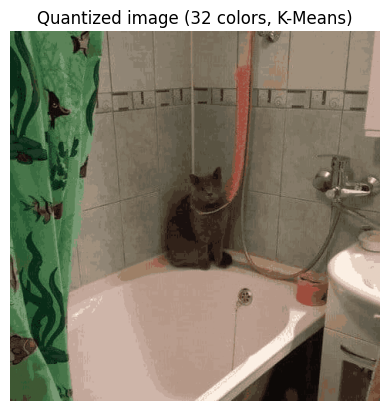

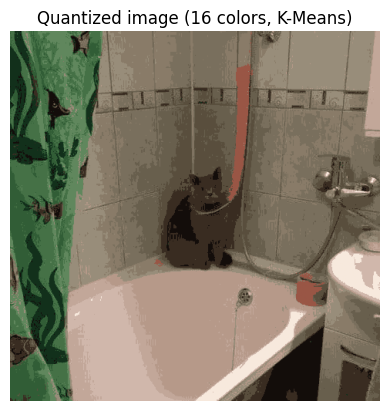

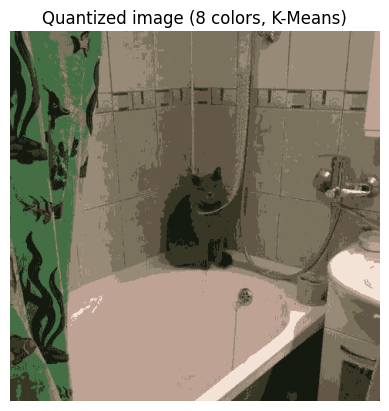

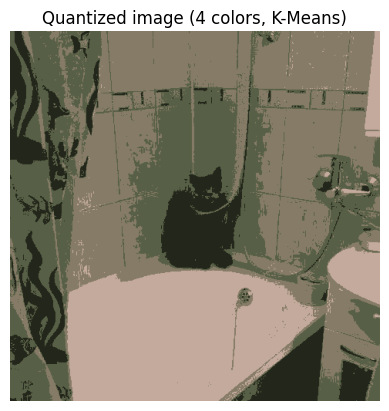

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

sc = Image.open('sadcat.jpg')
plt.figure()
plt.clf()
plt.axis("off")
plt.title('Original')
plt.imshow(sc)

sc = np.array(sc, dtype=np.float64) / 255

w, h, d = original_shape = tuple(sc.shape)
assert d == 3
image_array = np.reshape(sc, (w * h, d))

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

for n_colors in [64, 32, 16, 8, 4]:
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
        image_array_sample)
    
    labels = kmeans.predict(image_array)

    plt.figure()
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
